### INTRODUCTION
We have heart disease dataset with 13 indicators that can be used to predict whether a patient is likely to have heart disease or not.


### Reading  Data

In [165]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [166]:
#Checking for missing values
df.isnull().values.any()

False

### Exploratory Data Analysis

In [167]:
df.shape

(303, 14)

C:\Users\Pankaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


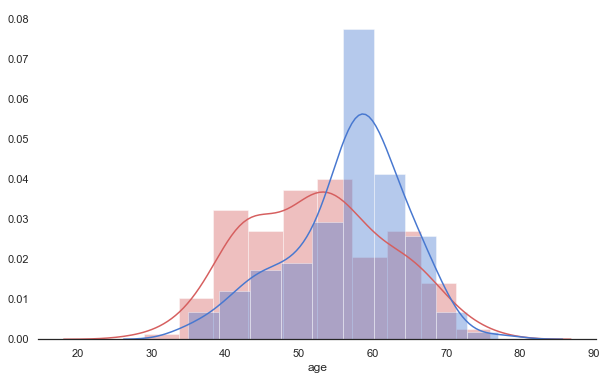

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

#Agewise distribution of patients w/ and w/o disease
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(figsize=(10,6))
sns.despine(left=True)

sns.distplot(df[df.target ==1].age,bins=10,color = 'r')
sns.distplot(df[df.target ==0].age,bins=10,color = 'b')


> Contrary to the belief, here the most patients with the heart disease are younger than those without disease. 

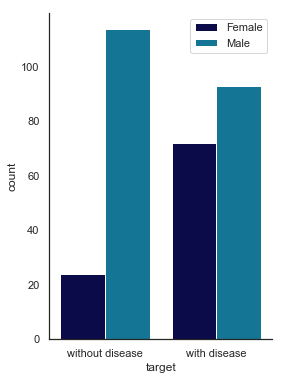

In [169]:
# Genderwise patients percentage

f, axes = plt.subplots(figsize=(4,6))
sns.despine()
sns.countplot(x='target', hue ='sex',data=df, palette="ocean")
plt.xticks([0,1],['without disease','with disease'])
plt.legend(["Female", "Male"])

> From the graph above we see that males have a greater likelihood of getting a heart disease

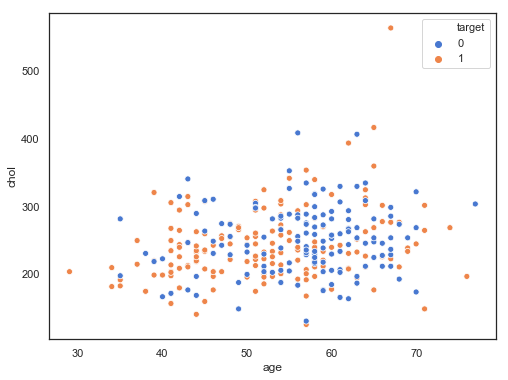

In [170]:
#Distribution of cholestrol among patients
f, axes = plt.subplots(figsize = (8,6))
sns.scatterplot(x ='age',y='chol',data =df,hue ='target')

### Data Preprocessing

In [171]:
# Creating Dummy Variables for Categorical Features

a = pd.get_dummies(df['cp'],prefix='cp')
b = pd.get_dummies(df['thal'],prefix='thal')
c = pd.get_dummies(df['slope'],prefix='slope')

df = pd.concat([df,a,b,c], axis= 1)
df = df.drop(columns= ['cp','thal','slope'])


In [172]:
# Creating Feature and Response Matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [173]:
#Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)


### Machine Learning Models


### Model 1: Logistic regression
    
    

In [190]:
#Model
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train)

#Prediction
lr_pred_set = lr_classifier.predict(X_test)

In [191]:
#Print cm and Accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_pred_set)
print(cm)
print("Test Accuracy {:.2f}%".format(lr_classifier.score(X_test,y_test)*100))

[[20  0]
 [ 0 41]]
Test Accuracy 100.00%


### Model 2: KNN Classification

In [192]:
# Model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p= 2)
knn_classifier.fit(X_train,y_train)

#Prediction
knn_pred_set = knn_classifier.predict(X_test)

In [193]:
#Print cm and Accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_pred_set)
print(cm)
print("Test Accuracy {:.2f}%".format(knn_classifier.score(X_test,y_test)*100))

[[17  3]
 [22 19]]
Test Accuracy 59.02%


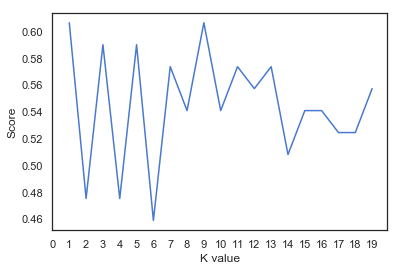

In [194]:
# Finding best value of K

acc_list = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    acc_list.append(knn.score(X_test,y_test))
    
plt.plot(range(1,20),acc_list)
plt.xticks(np.arange(0,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [195]:
print('The maximum accuracy is {:.2f}%.'.format(max(acc_list)*100))

The maximum accuracy is 60.66%.


###  Model 3: Support Vector Machines(SVM) Classification


In [196]:
# Model
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(X_train,y_train)


# Prediction
svc_pred_set = svm_classifier.predict(X_test)

In [197]:
# Print cm and Accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svc_pred_set)
print(cm)
print("Test Accuracy {:.2f}%".format(svm_classifier.score(X_test,y_test)*100))

[[20  0]
 [40  1]]
Test Accuracy 34.43%


### Model 4: Naive Bayes Algorithm 

In [199]:
# Model
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

# Prediction
nb_pred_set = nb_classifier.predict(X_test)

In [200]:
# Print cm and Accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,nb_pred_set)
print(cm)
print("Test Accuracy {:.2f}%".format(nb_classifier.score(X_test,y_test)*100))

[[20  0]
 [ 1 40]]
Test Accuracy 98.36%


### Model 5: Decision Tree Classification


In [201]:
# Model
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion= 'entropy')
tree_classifier.fit(X_train,y_train)

# Prediction
tree_pred_set = tree_classifier.predict(X_test)

In [202]:
# Print cm and Accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,tree_pred_set)
print(cm)
print("Test Accuracy {:.2f}%".format(tree_classifier.score(X_test,y_test)*100))

[[20  0]
 [ 0 41]]
Test Accuracy 100.00%


### Models' Accuracy Comparison

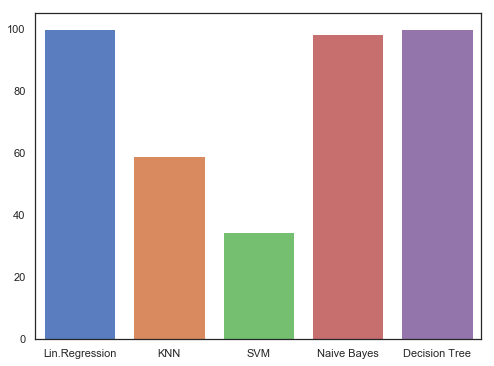

In [205]:
plt.figure(figsize=(8,6))
models =['Lin.Regression','KNN','SVM','Naive Bayes','Decision Tree']
accuracy = [lr_classifier.score(X_test,y_test)*100,knn_classifier.score(X_test,y_test)*100,svm_classifier.score(X_test,y_test)*100,nb_classifier.score(X_test,y_test)*100,tree_classifier.score(X_test,y_test)*100]
sns.barplot(x = models,y = accuracy)

Among the models used for classification, Linear Regression and Decision Tree were found to work best.